<a href="https://colab.research.google.com/github/zeyadmohammedabdullahhassan-rgb/Anime-Project-with-python/blob/main/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt


In [14]:
import seaborn as sns

In [15]:
from wordcloud import WordCloud

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("/content/anime.csv")

In [20]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [21]:
print(f"Shape: {df.shape}")

Shape: (12294, 7)


In [22]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [24]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [25]:
df['episodes']= pd.to_numeric(df['episodes'], errors='coerce')

In [26]:
df.dropna(inplace=True)

In [27]:
df['name']= df['name'].str.replace('&quot;', '', regex=False)

In [28]:
df['name']= df['name'].str.replace('&amp;', '&', regex=False)


--- Top 10 anime by members ---


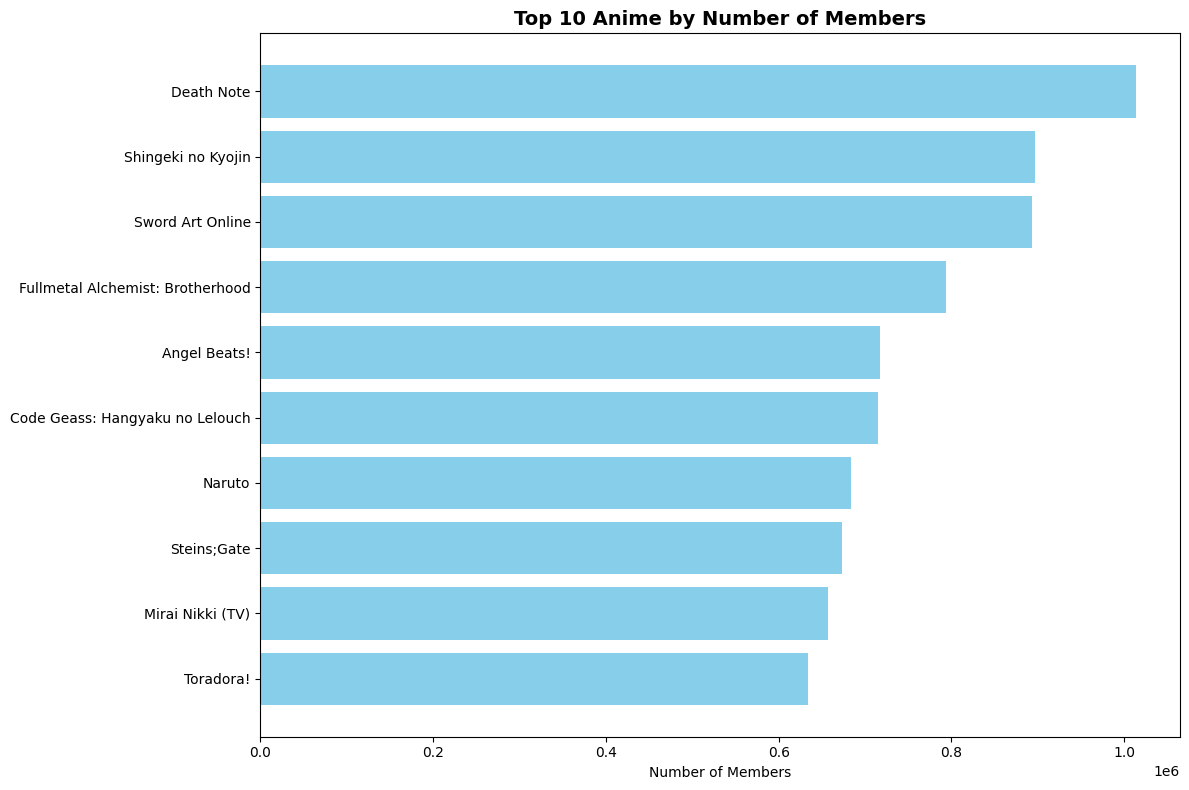

In [29]:
print("\n--- Top 10 anime by members ---")
plt.figure(figsize=(12, 8))
top_members = df.nlargest(10, 'members')[['name', 'members']]
plt.barh(top_members['name'], top_members['members'], color='skyblue')
plt.title('Top 10 Anime by Number of Members', fontsize=14, fontweight='bold')
plt.xlabel('Number of Members')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [30]:
print("\n--- Anime Type distribution ---")


--- Anime Type distribution ---


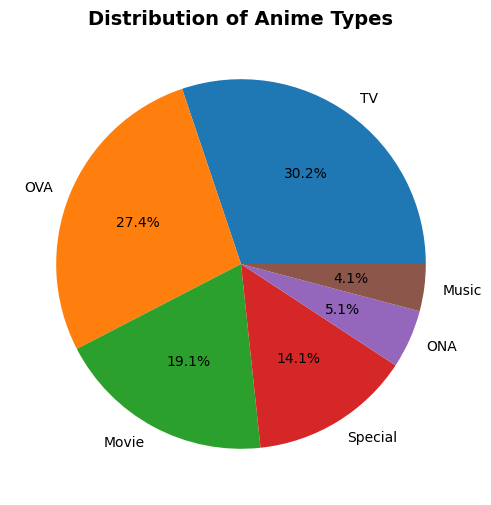

In [31]:
plt.figure(figsize=(10, 6))
type_distribution = df['type'].value_counts()
plt.pie(type_distribution.values, labels= type_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Anime Types', fontsize=14, fontweight='bold')
plt.show()

In [32]:
print('\n--- Rating distribution ---')


--- Rating distribution ---


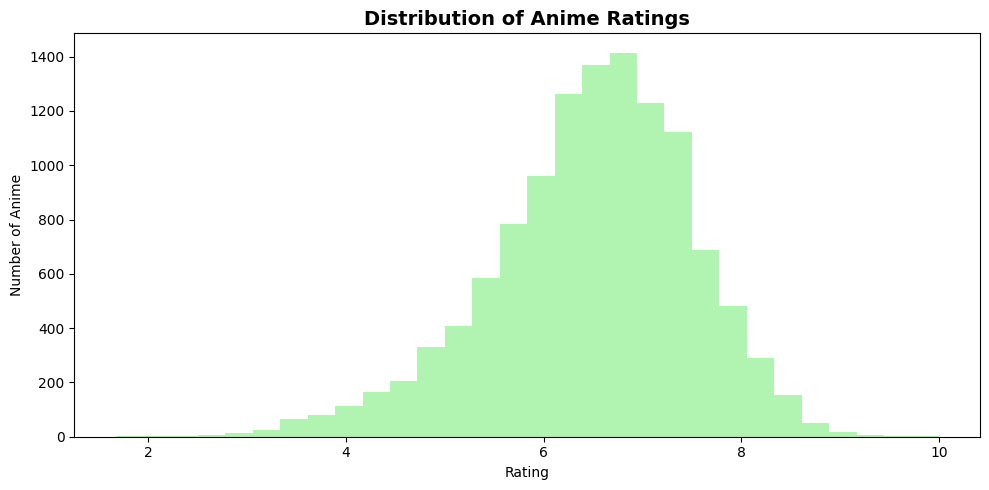

In [33]:
from scipy.stats import alpha
plt.figure(figsize=(10, 5))
plt.hist(df['rating'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Distribution of Anime Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Anime')
plt.tight_layout()
plt.show()

In [34]:
print("\n" + "="*50)
print("Genre Analysis")
print("="*50)


Genre Analysis



--- Most common genres ---


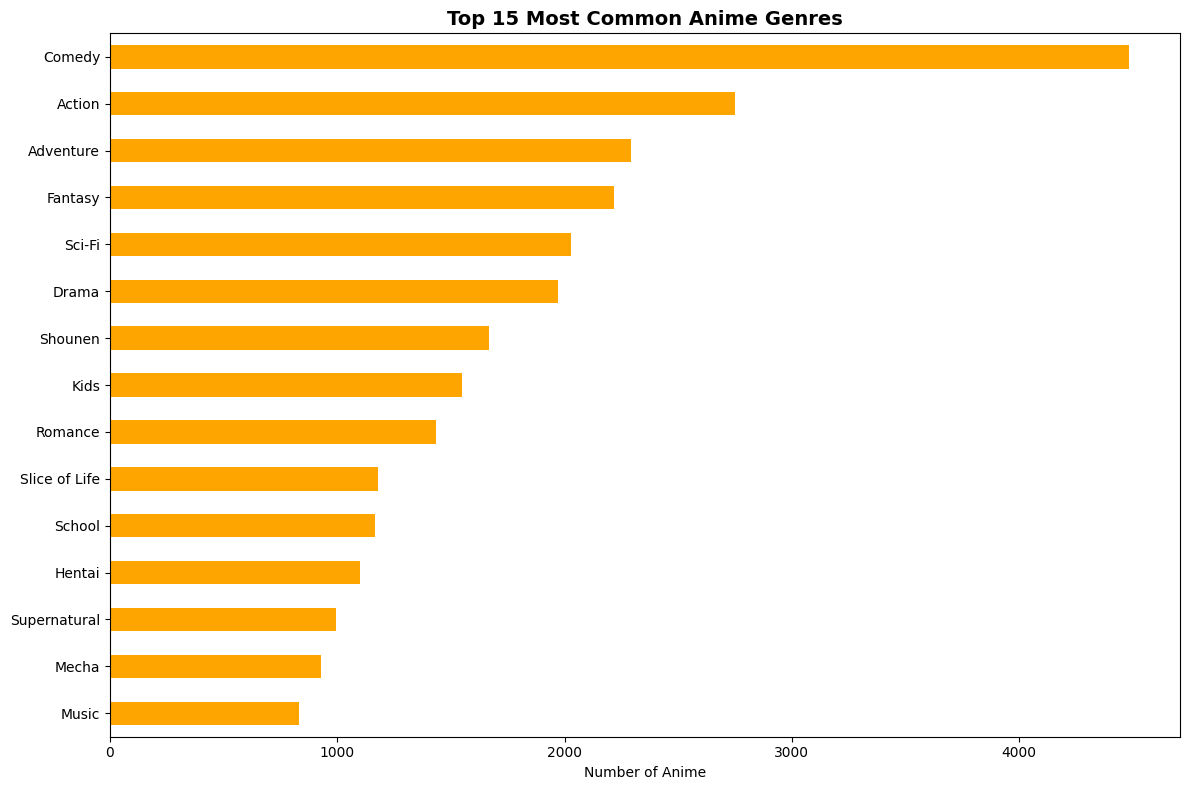

In [35]:

print("\n--- Most common genres ---")
df['genre_list'] = df['genre'].str.split(', ')
all_genres = []
for sublist in df['genre_list'].dropna():
    for genre in sublist:
        all_genres.append(genre)

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
genre_counts.head(15).plot(kind='barh', color='orange')
plt.title('Top 15 Most Common Anime Genres', fontsize=14, fontweight='bold')
plt.xlabel('Number of Anime')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

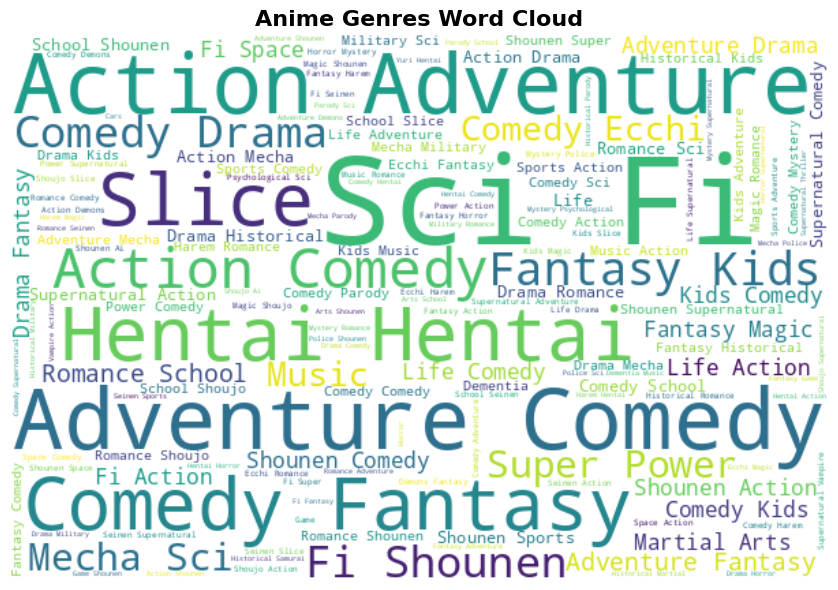

In [36]:
genre_text = ' '.join(all_genres)
wordcloud = WordCloud(width=600, height=400, background_color='white',colormap='viridis').generate(genre_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Anime Genres Word Cloud', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()






In [37]:
df_clean = df.copy()
df_clean['episodes'] = pd.to_numeric(df_clean['episodes'], errors='coerce')
df_clean['episodes'].fillna(df_clean['episodes'].median(), inplace=True)
df_clean.dropna(subset=['rating', 'members', 'episodes'], inplace=True)

print(f"Data ready for recommendation: {df_clean.shape}")

Data ready for recommendation: (11830, 8)


In [38]:
print("Converting genres...")
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(
    mlb.fit_transform(df_clean['genre_list']),
    columns=mlb.classes_,
    index=df_clean.index
)

Converting genres...


In [39]:

features = ['rating', 'members', 'episodes'] + list(mlb.classes_)
anime_features = pd.concat([df_clean[['rating', 'members', 'episodes']], genre_encoded], axis=1)

print(f"Number of features used: {len(features)}")

print("Scaling data...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(anime_features)

print("Calculating similarity between anime...")
similarity_matrix = cosine_similarity(scaled_features)

print(f"Similarity matrix ready: {similarity_matrix.shape}")

def recommend_content_based(anime_name, top_n=5):
    """
    Recommend similar anime based on content features

    Parameters:
    - anime_name: input anime name
    - top_n: number of recommendations (default 5)

    Returns:
    - List of recommended anime names
    - Error message if anime not found
    """

    if anime_name not in df_clean['name'].values:
        return "Anime not found in database"

    idx = df_clean[df_clean['name'] == anime_name].index[0]

    similar_scores = list(enumerate(similarity_matrix[idx]))

    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

    similar_scores = similar_scores[1:top_n+1]

    recommendations = []
    for i in similar_scores:
        anime_idx = i[0]
        anime_name = df_clean.iloc[anime_idx]['name']
        recommendations.append(anime_name)

    return recommendations

print("\n" + "="*50)
print("Testing recommendation system")
print("="*50)

test_animes = ["Naruto", "Death Note", "One Piece", "Attack on Titan"]

for anime in test_animes:
    print(f"\n🎌 Anime similar to '{anime}':")
    try:
        recommendations = recommend_content_based(anime, 3)

        if isinstance(recommendations, list):
            for i, rec in enumerate(recommendations, 1):
                print(f"   {i}. {rec}")
        else:
            print(f"    {recommendations}")
    except Exception as e:
        print(f"    Error: {e}")

print("\n" + "="*50)
print("Project Summary")
print("="*50)

print("\n Final data statistics:")
print(f"- Number of anime: {len(df_clean)}")
print(f"- Number of genres: {len(mlb.classes_)}")
print(f"- Average rating: {df_clean['rating'].mean():.2f}")
print(f"- Total members: {df_clean['members'].sum():,}")

print("\n What we accomplished:")
print(" Data loading and cleaning")
print(" Data analysis and visualization")
print(" Data transformation for machine learning")
print(" Content-based recommendation system")
print(" Data scaling and similarity calculation")

print("\n🚀 Project completed successfully!")

Number of features used: 46
Scaling data...
Calculating similarity between anime...
Similarity matrix ready: (11830, 11830)

Testing recommendation system

🎌 Anime similar to 'Naruto':
   1. Trava: Fist Planet
   2. Mobile Suit Gundam 00 The Movie: A Wakening of the Trailblazer
   3. Super Robot Taisen OG: The Inspector

🎌 Anime similar to 'Death Note':
   1. Mirai Nikki (TV)
   2. Steins;Gate
   3. Mahou Shoujo Madoka★Magica

🎌 Anime similar to 'One Piece':
    Anime not found in database

🎌 Anime similar to 'Attack on Titan':
    Anime not found in database

Project Summary

 Final data statistics:
- Number of anime: 11830
- Number of genres: 43
- Average rating: 6.48
- Total members: 218,985,163

 What we accomplished:
 Data loading and cleaning
 Data analysis and visualization
 Data transformation for machine learning
 Content-based recommendation system
 Data scaling and similarity calculation

🚀 Project completed successfully!


In [ ]:
# ===== TESTING THE MACHINE LEARNING MODEL =====

print("\n" + "="*50)
print("TESTING MACHINE LEARNING RECOMMENDATION SYSTEM")
print("="*50)

def test_recommendation_system():
    """
    Test the ML recommendation system with various cases
    """

    # Test Case 1: Normal recommendations
    print("\n TEST 1: Normal Recommendations")
    print("-" * 30)

    test_cases = [
        "Naruto",
        "Death Note",
        "One Piece",
        "Attack on Titan",
        "Sword Art Online"
    ]

    for anime in test_cases:
        print(f"\n Testing: {anime}")
        recommendations = recommend_content_based(anime, 3)

        if isinstance(recommendations, list):
            print(f"    Found {len(recommendations)} recommendations:")
            for i, rec in enumerate(recommendations, 1):
                # Find why it's recommended
                original_idx = df_clean[df_clean['name'] == anime].index[0]
                rec_idx = df_clean[df_clean['name'] == rec].index[0]
                similarity_score = similarity_matrix[original_idx][rec_idx]

                print(f"      {i}. {rec} (Similarity: {similarity_score:.3f})")
        else:
            print(f"    {recommendations}")

    # Test Case 2: Edge cases
    print("\n🔍 TEST 2: Edge Cases")
    print("-" * 30)

    edge_cases = [
        "Non-Existent Anime",  # Doesn't exist
        "",                    # Empty string
        "12345"               # Numbers only
    ]

    for anime in edge_cases:
        print(f"\n Testing: '{anime}'")
        recommendations = recommend_content_based(anime, 3)
        print(f"   Result: {recommendations}")

    # Test Case 3: Different recommendation counts
    print("\n TEST 3: Different Recommendation Counts")
    print("-" * 30)

    counts = [1, 5, 10]
    for count in counts:
        print(f"\n Testing with {count} recommendations:")
        recommendations = recommend_content_based("Naruto", count)
        if isinstance(recommendations, list):
            print(f"    Got {len(recommendations)} recommendations")
        else:
            print(f"    {recommendations}")

def analyze_recommendation_quality():
    """
    Analyze how good the recommendations are
    """
    print("\n" + "="*50)
    print("ANALYZING RECOMMENDATION QUALITY")
    print("="*50)

    # Check similarity scores distribution
    print("\n Similarity Scores Analysis:")
    all_similarities = similarity_matrix.flatten()
    print(f"   - Average similarity: {np.mean(all_similarities):.3f}")
    print(f"   - Max similarity: {np.max(all_similarities):.3f}")
    print(f"   - Min similarity: {np.min(all_similarities):.3f}")

    # Check top recommendations similarity
    print("\n Top Recommendations Quality:")
    test_anime = "Naruto"
    if test_anime in df_clean['name'].values:
        idx = df_clean[df_clean['name'] == test_anime].index[0]
        similar_scores = list(enumerate(similarity_matrix[idx]))
        similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

        print(f"   Top 5 similar to {test_anime}:")
        for i, (anime_idx, score) in enumerate(similar_scores, 1):
            anime_name = df_clean.iloc[anime_idx]['name']
            print(f"      {i}. {anime_name} - Score: {score:.3f}")

def test_specific_anime_features():
    """
    Test specific anime and see their features
    """
    print("\n" + "="*50)
    print("ANIME FEATURES ANALYSIS")
    print("="*50)

    sample_anime = "Naruto"
    if sample_anime in df_clean['name'].values:
        idx = df_clean[df_clean['name'] == sample_anime].index[0]

        print(f"\n Features for: {sample_anime}")
        print(f"   Rating: {df_clean.iloc[idx]['rating']}")
        print(f"   Members: {df_clean.iloc[idx]['members']}")
        print(f"   Episodes: {df_clean.iloc[idx]['episodes']}")
        print(f"   Genres: {df_clean.iloc[idx]['genre']}")

        # Show similar anime and their features
        print(f"\n Most similar anime:")
        recommendations = recommend_content_based(sample_anime, 3)
        for i, rec in enumerate(recommendations, 1):
            rec_idx = df_clean[df_clean['name'] == rec].index[0]
            print(f"   {i}. {rec}")
            print(f"      Rating: {df_clean.iloc[rec_idx]['rating']}")
            print(f"      Members: {df_clean.iloc[rec_idx]['members']}")
            print(f"      Genres: {df_clean.iloc[rec_idx]['genre']}")

# Run all tests
print(" Starting comprehensive ML system tests...")

# Test 1: Recommendation functionality
test_recommendation_system()

# Test 2: Quality analysis
analyze_recommendation_quality()

# Test 3: Features analysis
test_specific_anime_features()

print("\n" + "="*50)
print("ML SYSTEM TESTING COMPLETED!")
print("="*50)

# Interactive testing
print("\n🎮 INTERACTIVE TESTING")
print("Enter anime names to test (type 'quit' to exit):")

while True:
    user_input = input("\nEnter anime name: ").strip()

    if user_input.lower() == 'quit':
        break

    if user_input:
        recommendations = recommend_content_based(user_input, 5)

        if isinstance(recommendations, list):
            print(f"\n Recommendations for '{user_input}':")
            for i, rec in enumerate(recommendations, 1):
                # Get additional info about recommendations
                rec_idx = df_clean[df_clean['name'] == rec].index[0]
                print(f"   {i}. {rec}")
                print(f"      Rating: {df_clean.iloc[rec_idx]['rating']} | Members: {df_clean.iloc[rec_idx]['members']} | Type: {df_clean.iloc[rec_idx]['type']}")
        else:
            print(f" {recommendations}")

print("\n✨ All tests completed! Your ML system is working! ✨")


TESTING MACHINE LEARNING RECOMMENDATION SYSTEM
 Starting comprehensive ML system tests...

 TEST 1: Normal Recommendations
------------------------------

 Testing: Naruto
    Found 3 recommendations:
      1. Trava: Fist Planet (Similarity: -0.177)
      2. Mobile Suit Gundam 00 The Movie: A Wakening of the Trailblazer (Similarity: -0.012)
      3. Super Robot Taisen OG: The Inspector (Similarity: -0.075)

 Testing: Death Note
    Found 3 recommendations:
      1. Mirai Nikki (TV) (Similarity: -0.032)
      2. Steins;Gate (Similarity: 0.835)
      3. Mahou Shoujo Madoka★Magica (Similarity: 0.456)

 Testing: One Piece
    Anime not found in database

 Testing: Attack on Titan
    Anime not found in database

 Testing: Sword Art Online
    Found 3 recommendations:
      1. Neon Genesis Evangelion: Death & Rebirth (Similarity: 0.051)
      2. Bokurano Recap (Similarity: 0.047)
      3. Meiou Project Zeorymer (Similarity: 0.047)

🔍 TEST 2: Edge Cases
------------------------------

 Test